In [4]:
# From the course: Bayesin Machine Learning in Python: A/B Testing
# https://deeplearningcourses.com/c/bayesian-machine-learning-in-python-ab-testing
# https://www.udemy.com/bayesian-machine-learning-in-python-ab-testing
from __future__ import print_function, division
from builtins import range
# Note: you may need to update your version of future
# sudo pip install -U future

In [5]:
import matplotlib.pyplot as plt
import numpy as np

In [6]:
NUM_TRIALS = 10000
EPS = 0.1
BANDIT_PROBABILITIES = [0.2, 0.5, 0.75]

In [17]:
class Bandit:
    def __init__(self, p):
        # p: the win rate
        self.p = p
        self.p_estimate = 5 # A high initial value !!!
        self.N = 1 # Trick: You have to set N=1, de otra forma se borrará el p_estimate (Ver update function)

    def pull(self):
        # draw a 1 with probability p
        return np.random.random() < self.p

    def update(self, x):
        self.N += 1.
        # Si empezamos en N=0, acá valdría N=1, y (1-1)*p_estimate no usaría el optimistic high value
        self.p_estimate = ((self.N-1) / self.N)*self.p_estimate + (x / self.N)  

mean estimate: 0.7
mean estimate: 0.7241379310344827
mean estimate: 0.7623444399839401
total reward earned: 7609.0
overall win rate: 0.7609
num times selected each bandit: [10.0, 29.0, 9964.0]


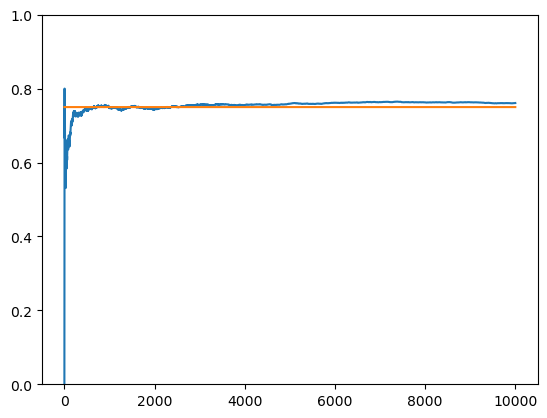

In [28]:
def experiment():
    bandits = [Bandit(p) for p in BANDIT_PROBABILITIES]
    rewards = np.zeros(NUM_TRIALS)
    
    for i in range(NUM_TRIALS):
        # use optimistic initial values to select the next bandit
        # no se necesita opción epsilon porque si un bandido se empieza a usar más, empieza a bajar de promedio y por lo tanto se empieza a explorar otro bandido
        j = np.argmax([b.p_estimate for b in bandits]) # TODO

        # pull the arm for the bandit with the largest sample
        x = bandits[j].pull()

        # update rewards log
        rewards[i] = x

        # update the distribution for the bandit whose arm we just pulled
        bandits[j].update(x)
        
        
    # print mean estimates for each bandit
    for b in bandits:
        print("mean estimate:", b.p_estimate)

    # print total reward
    print("total reward earned:", rewards.sum())
    print("overall win rate:", rewards.sum() / NUM_TRIALS)
    print("num times selected each bandit:", [b.N for b in bandits])

    # plot the results
    cumulative_rewards = np.cumsum(rewards)
    win_rates = cumulative_rewards / (np.arange(NUM_TRIALS) + 1)
    plt.ylim([0, 1])
    plt.plot(win_rates)
    plt.plot(np.ones(NUM_TRIALS)*np.max(BANDIT_PROBABILITIES))
    plt.show()

if __name__ == "__main__":
  experiment()

#### Aprendizajes
1) Mejoramos mucho cerrando el gap entre win_rate y optimal rate, pues ya no experimentamos tanto
2) Los mean_estimates(salvo el óptimo, quizás) no se acercan al valor de probabildad pre-asignada.
   La razón es que los bandidos sub-óptimos se dejan de seleccionar (y de updatear) una vez que su promedio desciende por debajo de 0.75 (reward del bandido óptimo) y no logran converger al true-mean.
3) La cantidad de tiempo que pasamos usando el bandido óptimo es muchísimo mayor que con el algoritmo greedy.
   num times selected each bandit: [10.0, 29.0, 9964.0]

In [22]:
%whos

Variable               Type        Data/Info
--------------------------------------------
BANDIT_PROBABILITIES   list        n=3
Bandit                 type        <class '__main__.Bandit'>
EPS                    float       0.1
NUM_TRIALS             int         10000
division               _Feature    _Feature((2, 2, 0, 'alpha<...>, 0, 'alpha', 0), 131072)
experiment             function    <function experiment at 0x7fbf277dd480>
np                     module      <module 'numpy' from '/ho<...>kages/numpy/__init__.py'>
plt                    module      <module 'matplotlib.pyplo<...>es/matplotlib/pyplot.py'>
print_function         _Feature    _Feature((2, 6, 0, 'alpha<...> 0, 'alpha', 0), 1048576)
range                  type        <class 'range'>
